# Aprendizagem - Homework IV
### II. Programming - Grupo99
(ist1106059, ist1106329)

In [26]:
import pandas as pd

df = pd.read_csv('accounts.csv')
df = df.iloc[:, :8].drop_duplicates().dropna()
df = pd.get_dummies(df, drop_first=True)
print(df)

       age  balance  job_blue-collar  job_entrepreneur  job_housemaid  \
0       59     2343            False             False          False   
1       56       45            False             False          False   
2       41     1270            False             False          False   
3       55     2476            False             False          False   
4       54      184            False             False          False   
...    ...      ...              ...               ...            ...   
11156   34      -72             True             False          False   
11157   33        1             True             False          False   
11158   39      733            False             False          False   
11159   32       29            False             False          False   
11160   43        0            False             False          False   

       job_management  job_retired  job_self-employed  job_services  \
0               False        False              Fals

1:

a)

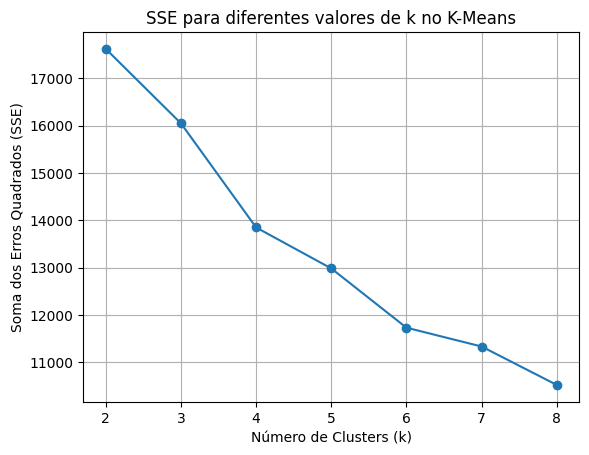

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_norm = MinMaxScaler().fit_transform(df)

k_values = range(2, 9)
sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42).fit(df_norm)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.title('SSE para diferentes valores de k no K-Means')
plt.grid(True)
plt.show()

b) 8

c) Sim, porque o dataset tem muitas variáveis categóricas.

2:

a)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_standardized = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_standardized)
explained_variance = pca.explained_variance_ratio_.sum()

print(f"Variância explicada pelos dois primeiros componentes principais: {explained_variance * 100:.2f}%")

Variância explicada pelos dois primeiros componentes principais: 22.76%


b)

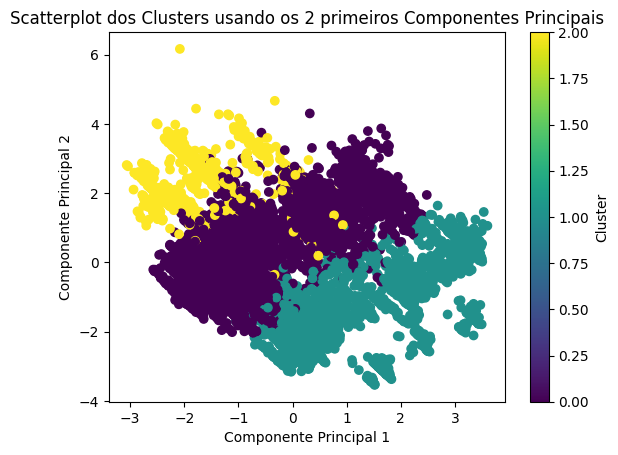

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_standardized)
clusters = kmeans.labels_

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Scatterplot dos Clusters usando os 2 primeiros Componentes Principais')
plt.colorbar(label='Cluster')
plt.show()

c)

In [ ]:
data_selected['cluster'] = clusters

# Plotar distribuições de "job" e "education" para cada cluster
plt.figure(figsize=(14, 6))

# Distribuição de "job"
plt.subplot(1, 2, 1)
sns.histplot(data_selected, x="job", hue="cluster", multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.xticks(rotation=90)
plt.title("Distribuição de 'job' por cluster")

# Distribuição de "education"
plt.subplot(1, 2, 2)
sns.histplot(data_selected, x="education", hue="cluster", multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.xticks(rotation=90)
plt.title("Distribuição de 'education' por cluster")

plt.tight_layout()
plt.show()
